In [129]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

%matplotlib inline

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 16
get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

This quick notebook compares various ways of applying map and filter functions: using the builtin map() and filter(), list comprehensions, and standard for loops. We will also try different ways of applying our function.

We'll profile each methods to see which wins!

# map

### map() + lambda

In [139]:
def map_lambda():
    return map(lambda x: x%3, range(1000000))

t_map_lambda = %timeit -o -r 10 -n 1 map_lambda()

1 loops, best of 10: 290 ms per loop


### map() + function

In [140]:
def modd(x):
    return x%3

def map_def():
    return map(modd, range(1000000))

t_map_def = %timeit -o -r 10 -n 1 map_def()

1 loops, best of 10: 297 ms per loop


### list comprehension

In [141]:
def map_list():
    return [x%3 for x in range(1000000)]

t_map_list = %timeit -o -r 10 -n 1 map_list()

1 loops, best of 10: 189 ms per loop


### list comprehension + function

In [142]:
def map_list_def():
    return [modd(x) for x in range(1000000)]

t_map_list_def = %timeit -o -r 10 -n 1 map_list_def()

1 loops, best of 10: 329 ms per loop


### for loop

In [143]:
def map_for_loop():
    l = range(1000000)
    for i, x in enumerate(l):
        l[i] = x % 3
    return l

t_map_for_loop = %timeit -o -r 10 -n 1 map_for_loop()

1 loops, best of 10: 226 ms per loop


### for loop + function

In [144]:
def map_for_loop_def():
    l = range(1000000)
    for i, x in enumerate(l):
        l[i] = modd(x)
    return l

t_map_for_loop_def = %timeit -o -r 10 -n 1 map_for_loop_def()

1 loops, best of 10: 376 ms per loop


## map results

In [145]:
t_map_def.__dict__

{'_precision': 3,
 'all_runs': [0.3301060199737549,
  0.3219339847564697,
  0.3202390670776367,
  0.32208800315856934,
  0.3269071578979492,
  0.3036959171295166,
  0.31177306175231934,
  0.3056180477142334,
  0.3161180019378662,
  0.29650187492370605],
 'best': 0.29650187492370605,
 'compile_time': 0.00017199999996364568,
 'loops': 1,
 'repeat': 10,
 'worst': 0.3301060199737549}

In [108]:
map_results = {
    'map()\n+ lambda': [np.mean(t_map_lambda.all_runs), np.std(t_map_lambda.all_runs)],
    'map()\n+ def': [np.mean(t_map_def.all_runs), np.std(t_map_def.all_runs)],
    'list comp': [np.mean(t_map_list.all_runs), np.std(t_map_list.all_runs)],
    'list comp\n+ def': [np.mean(t_map_list_def.all_runs), np.std(t_map_list_def.all_runs)],
    'for loop': [np.mean(t_map_for_loop.all_runs), np.std(t_map_for_loop.all_runs)],
    'for loop\n+ def': [np.mean(t_map_for_loop_def.all_runs), np.std(t_map_for_loop_def.all_runs)]
}

map_results_ordered = OrderedDict(sorted(map_results.items(), key=lambda t: t[1][0]))

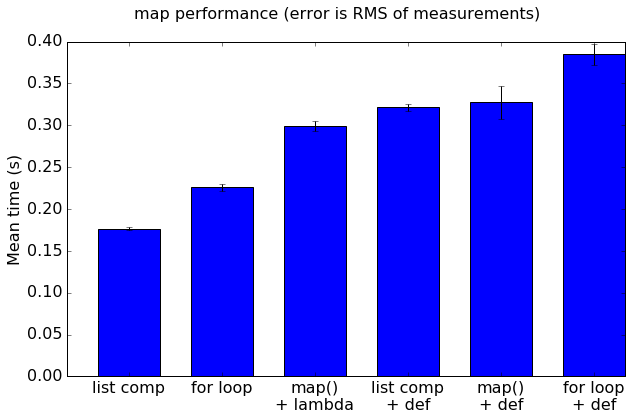

In [146]:
plt.bar(left=[i*3 for i in range(len(map_results))], 
        width=2, 
        height=[x[0] for x in map_results_ordered.values()], 
        yerr=[x[1] for x in map_results_ordered.values()], 
        tick_label=map_results_ordered.keys(), 
        align='center',
        ecolor='black')
plt.ylabel('Mean time (s)')
plt.suptitle('map performance (error is RMS of measurements)')

# filter 

### filter() + lambda

In [147]:
def filter_lambda():
    return filter(lambda x: x in [1,2,3,4,5], range(1000000))

t_filter_lambda = %timeit -o -r 10 -n 1 filter_lambda()

1 loops, best of 10: 365 ms per loop


### filter() + function

In [148]:
def check(i):
    return i in [1,2,3,4,5]

def filter_def():
    return filter(check, range(1000000))

t_filter_def = %timeit -o -r 10 -n 1 filter_def()

1 loops, best of 10: 368 ms per loop


### list comprehension

In [149]:
def filter_list():
    return [x for x in range(1000000) if x in [1,2,3,4,5]]

t_filter_list = %timeit -o -r 10 -n 1 filter_list()

1 loops, best of 10: 248 ms per loop


### list comprehension + function

In [150]:
def filter_list_def():
    return [x for x in range(1000000) if check(x)]

t_filter_list_def = %timeit -o -r 10 -n 1 filter_list_def()

1 loops, best of 10: 371 ms per loop


## filter results

In [154]:
t_filter_lambda.__dict__

{'_precision': 3,
 'all_runs': [0.3898890018463135,
  0.5009708404541016,
  0.4104897975921631,
  0.4889061450958252,
  0.38635993003845215,
  0.3881540298461914,
  0.36940503120422363,
  0.36525416374206543,
  0.40778493881225586,
  0.4478909969329834],
 'best': 0.36525416374206543,
 'compile_time': 0.0001720000000204891,
 'loops': 1,
 'repeat': 10,
 'worst': 0.5009708404541016}

In [151]:
filter_results = {
    'filter()\n+ lambda': [np.mean(t_filter_lambda.all_runs), np.std(t_filter_lambda.all_runs)],
    'filter()\n+ def': [np.mean(t_filter_def.all_runs), np.std(t_filter_def.all_runs)],
    'list comp': [np.mean(t_filter_list.all_runs), np.std(t_filter_list.all_runs)],
    'list comp\n+ def': [np.mean(t_filter_list_def.all_runs), np.std(t_filter_list_def.all_runs)],
}

filter_results_ordered = OrderedDict(sorted(filter_results.items(), key=lambda t: t[1][0]))

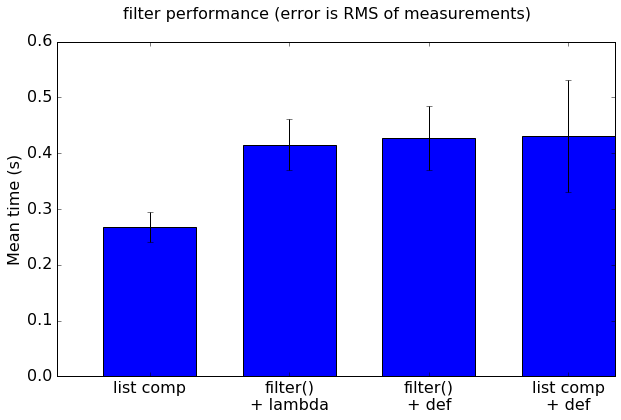

In [152]:
plt.bar(left=[i*3 for i in range(len(filter_results))], 
        width=2, 
        height=[x[0] for x in filter_results_ordered.values()], 
        yerr=[x[1] for x in filter_results_ordered.values()], 
        tick_label=filter_results_ordered.keys(), 
        align='center',
        ecolor='black')
plt.ylabel('Mean time (s)')
plt.suptitle('filter performance (error is RMS of measurements)')